In [2]:
import time

In [3]:
class pidController:
    def __init__(self, p=0.0, i=0.0, d=0.0, windup_use=False):
        self.kp = p
        self.ki = i
        self.kd = d
        self.windup_use = windup_use
        
        self.sample_time = 0.0
        self.cur_time = time.time()
        self.prev_time = self.cur_time
        
        self.clear()
        
    def clear(self):
        self.setPoint = 0.0
        
        self.pTerm = 0.0
        self.iTerm = 0.0
        self.dTerm = 0.0
        self.prev_err = 0.0
        
        # windup guard
        self.int_err = 0.0
        self.windup = 20.0
        
        self.output = 0.0
        
    def update(self, feedback_val):
        # u(t) = K_p e(t) + K_i \int_{0}^{t} e(t)dt + K_d {de}/{dt}
        cur_err = self.setPoint - feedback_val
        
        self.cur_time = time.time()
        dt = self.cur_time - self.prev_time
        de = cur_err - self.prev_err
        
        if(dt >= self.sample_time):
            self.pTerm = cur_err
            self.iTerm += cur_err*dt
            
            if(self.windup_use):
                if(self.iTerm < -self.windup):
                    self.iTerm = - self.windup
                elif(self.iTerm > self.windup):
                    self.iTerm = self.windup
            
            self.dTerm = 0.0
            if(dt > 0):
                self.dTerm = de/dt
                
            self.prev_time = self.cur_time
            self.prev_err = cur_err
            
            self.output = self.kp*self.pTerm + self.ki*self.iTerm + self.kd*self.dTerm
            
    def setKp(self, proportional_gain):
        self.kp = proportional_gain

    def setKi(self, integral_gain):
        self.ki = integral_gain

    def setKd(self, derivative_gain):
        self.kd = derivative_gain

    def setWindup(self, windup):
        """Integral windup, also known as integrator windup or reset windup,
        refers to the situation in a PID feedback controller where
        a large change in setpoint occurs (say a positive change)
        and the integral terms accumulates a significant error
        during the rise (windup), thus overshooting and continuing
        to increase as this accumulated error is unwound
        (offset by errors in the other direction).
        The specific problem is the excess overshooting.
        """
        self.windup = windup

    def setSampleTime(self, sample_time):
        """PID that should be updated at a regular interval.
        Based on a pre-determined sampe time, the PID decides if it should compute or return immediately.
        """
        self.sample_time = sample_time

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline

0.5050278157501582


/home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


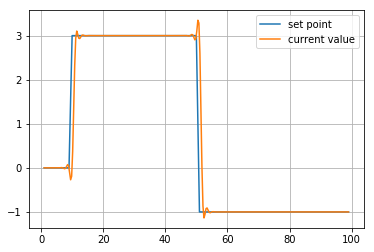

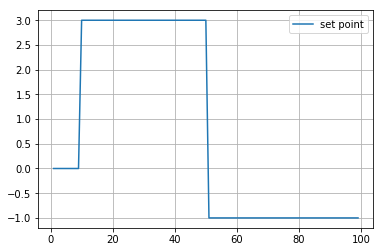

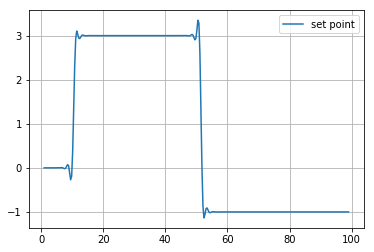

In [6]:
pid = pidController(0.9, 0., 0.00001)
itr_f = 100
feedback = 0.0
pid.setPoint = 0.0
pid.setSampleTime(0.01)

feedback_list = []
time_list = []
setPoint_list = []

for i in range(1, itr_f):
    pid.update(feedback)
    output = pid.output

    feedback += (output)
    if(i > 9):
        pid.setPoint = 3
    
    if(i > 50):
        pid.setPoint = -1
        
    time.sleep(0.02)
    
    feedback_list.append(feedback)
    setPoint_list.append(pid.setPoint)
    time_list.append(i)

error = np.sqrt(np.mean(np.square(np.subtract(feedback_list, setPoint_list))))
print(error)
time_sm = np.array(time_list)
time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)
feedback_smooth = spline(time_list, feedback_list, time_smooth)

plt.figure()
plt.plot(time_list, setPoint_list)
plt.plot(time_smooth, feedback_smooth)
# plt.plot(time_list, feedback_list)
plt.legend(['set point', 'current value'])
plt.grid()
plt.show()

plt.figure()
plt.plot(time_list, setPoint_list)
# plt.plot(time_list, feedback_list)
plt.legend(['set point', 'current value'])
plt.grid()
plt.show()

plt.figure()
plt.plot(time_smooth, feedback_smooth)
# plt.plot(time_list, feedback_list)
plt.legend(['set point', 'current value'])
plt.grid()
plt.show()
